# Information
This code is base on the google search of
```
DataSet TB3.xls kaggle knn
```

# Reference
1. [KNN Classification Tutorial using Scikit-learn](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn)
2. [How to find the optimal value of K in KNN?](https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb)
3. [Diabetes_prediction](https://www.kaggle.com/code/nisargdevani/diabetes-prediction/notebook)

# Imoprt Library Needed

In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# retreive the data needed to be train

In [26]:
data = pd.read_excel('DataSetTB3_SHARE.xlsx')
data

,idData,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,9,0,0,0,0,0,0,0,0,...,253,74,0,0,0,0,0,0,0,0
1496,1497,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,1498,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,1499,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Drop one (1) data to make an K

In [27]:
X = data.drop(['label', 'idData'], axis = 1)
y = data['label']

# Split the data and train

In [28]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

# Train data and predict the accuracy

In [29]:
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.8333333333333334


# Optimal K Value

Minimum error:- 0.16666666666666666 at K = 3


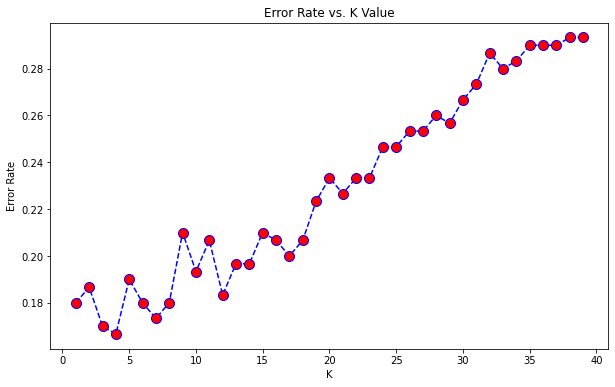

In [30]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

# visualize the plot between accuracy and K value

Maximum accuracy:- 0.8333333333333334 at K = 3


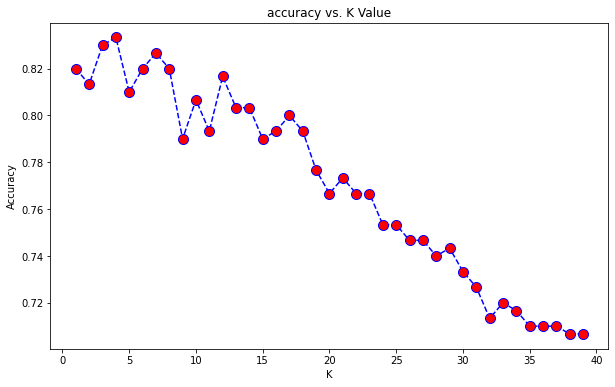

In [32]:
acc = []

from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [33]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
predictt = knn.predict(X_test)
print(confusion_matrix(y_test, predictt))

[[32  0  0  0  0  0  1  0  0  0]
 [ 0 26  0  0  0  0  1  0  0  0]
 [ 1  1 28  2  0  1  1  0  2  0]
 [ 0  1  0 25  2  2  0  0  0  1]
 [ 0  0  0  1 23  0  0  1  0  3]
 [ 0  0  0  3  0 25  1  0  0  1]
 [ 1  0  0  0  0  0 26  0  1  0]
 [ 0  3  0  0  2  0  0 24  0  3]
 [ 0  0  1  3  0  3  0  0 16  2]
 [ 1  1  1  0  1  0  0  5  0 21]]


In [37]:
print(classification_report(y_test, predictt))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.81      0.96      0.88        27
           2       0.93      0.78      0.85        36
           3       0.74      0.81      0.77        31
           4       0.82      0.82      0.82        28
           5       0.81      0.83      0.82        30
           6       0.87      0.93      0.90        28
           7       0.80      0.75      0.77        32
           8       0.84      0.64      0.73        25
           9       0.68      0.70      0.69        30

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

